In [1]:
import pandas as pd
import bs4
import urllib
import requests

In [60]:
user_zip = input("Enter zip code: ")
url = "https://pets.overstock.com/pets/Cranbury-NJ/Cat,/species,/{}?distance=10".format(user_zip)
page = urllib.request.urlopen(url)
soup = bs4.BeautifulSoup(page, 'lxml')
results = soup.find('div', {'class': 'search-results'}).findAll('div', {'class': 'pet-lower'})
#print(results)
#[res.find('a', {'class': 'image-link'}) for res in results]

Enter zip code: 08512


In [61]:
pet_list = []
pet_list.append(['Pet Name', 'Pet Type', 'Pet Age', 'Pet Sex', 'Pet Size', 'Pet Shelter', 'Pet City', 'Pet State'])

In [62]:
for res in results:
    pet_name = res.find('a', {'class': 'image-link'}).text.strip()
    pet_type = res.find('div', {'class': 'pet-type'}).text.strip()
    pet_tags = res.find('ul').findAll('li')
    try:
        pet_age = pet_tags[0].text.strip()
    except IndexError:
        pet_age = ''
    try:
        pet_sex = pet_tags[1].text.strip()
    except:
        pet_sex = ''
    try:
        pet_size = pet_tags[2].text.strip()
    except IndexError:
        pet_size = ''
    pet_shelter = res.find('a', {'class': 'shelter-name'}).text.strip()
    pet_loc = res.find('span', {'class': 'pet-loc'}).text.strip()
    pet_loc = pet_loc.split(', ')
    pet_city = pet_loc[0]
    pet_state = pet_loc[1]
    pet_list.append([pet_name, pet_type, pet_age, pet_sex, pet_size, pet_shelter, pet_city, pet_state])
    #print(pet_name, pet_type, pet_age, pet_sex, pet_size, pet_shelter, pet_city, pet_state)

In [56]:
import csv

with open('pet-csv-{}.csv'.format(user_zip), 'w') as f_output:
    csv_output = csv.writer(f_output)
    csv_output.writerows(pet_list)

In [64]:
df = pd.read_csv('pet-csv-08512.csv')
df.head()

,Pet Name,Pet Type,Pet Age,Pet Sex,Pet Size,Pet Shelter,Pet City,Pet State
0,LH Lovey,Domestic Short Hair,Adult,Female,Medium,Trenton Cats Rescue,Hightstown,New Jersey
1,LH Valentino,Domestic Short Hair,Adult,Male,Small,Trenton Cats Rescue,Hightstown,New Jersey
2,Glen,Domestic Shorthair,Adult,Male,NaN,All God's Creatures Inc,Hightstown,New Jersey
3,Ursula,Domestic Longhair,Young,Female,NaN,All God's Creatures Inc,Hightstown,New Jersey
4,Trixie,Domestic Shorthair,Adult,Female,NaN,All God's Creatures Inc,Hightstown,New Jersey


In [65]:
sort_age = df['Pet Age'].groupby(df['Pet Age'])
count = sort_age.count()
count

Pet Age
Adult     14
Baby      16
Kitten     9
Young     11
Name: Pet Age, dtype: int64

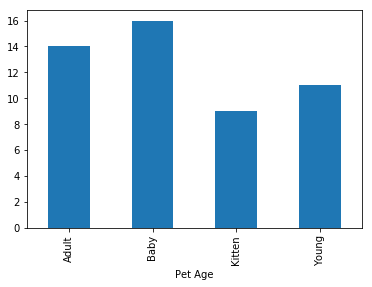

In [66]:
import matplotlib.pyplot as plt
ax = count.plot(kind = 'bar')
plt.show()